In [1]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt
from scipy.optimize import minimize

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

# Numerical Optimization 

## 1) Example of a constrained optimization problem

Suppose we want to maximize the area of a rectangle with sides `d1` and `d2`. 

We store these design variables in the array `x = np.array([d1,d2])`.

We add to this problem a constraint that the perimeter should be less than a given quantity. The functions below evaluate the area and perimeter for input variable `x`. 

In [2]:
def A(x):
    d1 = x[0]
    d2 = x[1]
    return d1*d2


def P(x):
    d1 = x[0]
    d2 = x[1]
    return 2*(d1+d2)


We can visualize how the area and perimeter change with `x` using 3d plots:

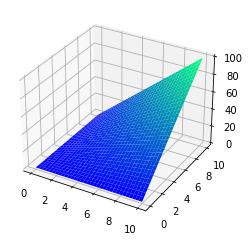

In [3]:
fig = plt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[0:10:100j,0:10:100j]
AMesh = A(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, AMesh, cmap=plt.cm.winter, rstride=3, cstride=3)

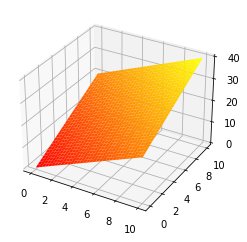

In [4]:
fig2 = plt.figure()
ax = fig2.gca(projection="3d")

PMesh = P(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, PMesh,  cmap=plt.cm.autumn, rstride=3, cstride=3)

<a list of 9 text.Text objects>

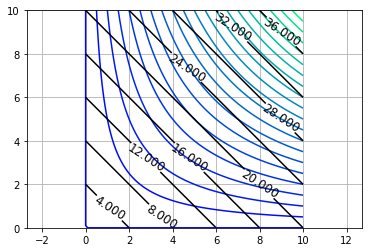

In [5]:
plt.axis("equal")
plt.grid()
figc1 = plt.contour(xmesh, ymesh, AMesh, 20, cmap=plt.cm.winter)
figc2 = plt.contour(xmesh, ymesh, PMesh, 10, colors='k')
plt.clabel(figc2, inline=1, fontsize=12)

Let's say we want to solve:

```html
max A
st  P <= 20
```

or to use with minimize function

```html
min f = -A
st g = 20 - P >= 0
```

In [6]:
#Initial guess
x0 = np.array([9,1])
f = lambda x: -A(x) 
g = lambda x: 20 - P(x)
minimize(f, x0, constraints=({'type': 'ineq', 'fun': lambda x: g(x)}))

     fun: -24.999999999999815
     jac: array([-4.99999976, -4.99999976])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([5., 5.])

## 2) 1D Optimization Methods

In this activity, we will find the optimizer of functions in 1d using two iterative methods. For each one, you should be thinking about cost and convergence rate.

The iterative methods below can be applied to more complex equations, but here we will use a simple polynomial function of the form:

$$f(x) =  a x^4 + b x^3 + c x^2 + d x + e $$

The code snippet below provides the values for the constants, and functions to evaluate $f(x)$, $f'(x)$ and $f''(x)$.

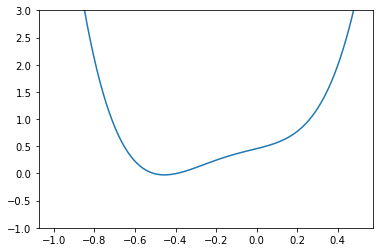

In [7]:
a = 17.09
b = 9.79
c = 0.6317
d = 0.9324
e = 0.4565

def f(x):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

def df(x):
    return 4*a*x**3 + 3*b*x**2 + 2*c*x + d

def d2f(x):
    return 3*4*a*x**2 + 2*3*b*x + 2*c

xmesh = np.linspace(-1, 0.5, 100)
plt.ylim([-1, 3])
plt.plot(xmesh, f(xmesh))

### a) Golden Section Search

In [8]:
tau = (np.sqrt(5)-1)/2

a0 = -0.9 #-2
b0 = -0.2 #1

h_k = b0 - a0  

x1 = a0 + (1-tau) * h_k
x2 = a0 + tau * h_k
print(x1,x2)
f1 = f(x1)
f2 = f(x2)

errors = [np.abs(h_k)]
count = 0

while (count < 30 and np.abs(h_k) > 1e-6):
 
    if  f1>f2:
        a0 = x1
        x1 = x2
        f1 = f2
        h_k = b0-a0
        x2 = a0 + tau * h_k
        f2 = f(x2)
    else:
        b0 = x2
        x2 = x1
        f2 = f1
        h_k = b0-a0
        x1 = a0 + (1-tau) * h_k
        f1 = f(x1)        
    errors.append(np.abs(h_k))  
    
    print("%10g \t %10g \t %12g %12g" % (a0, b0, errors[-1], errors[-1]/errors[-2]))
    


-0.6326237921249265 -0.4673762078750736
 -0.632624 	       -0.2 	     0.432624     0.618034
 -0.632624 	  -0.365248 	     0.267376     0.618034
 -0.530495 	  -0.365248 	     0.165248     0.618034
 -0.530495 	  -0.428367 	     0.102129     0.618034
 -0.491486 	  -0.428367 	     0.063119     0.618034
 -0.467376 	  -0.428367 	    0.0390097     0.618034
 -0.467376 	  -0.443267 	    0.0241093     0.618034
 -0.458167 	  -0.443267 	    0.0149004     0.618034
 -0.458167 	  -0.448958 	   0.00920893     0.618034
 -0.458167 	  -0.452476 	   0.00569143     0.618034
 -0.455993 	  -0.452476 	    0.0035175     0.618034
 -0.455993 	  -0.453819 	   0.00217393     0.618034
 -0.455993 	   -0.45465 	   0.00134357     0.618034
  -0.45548 	   -0.45465 	  0.000830369     0.618034
 -0.455163 	   -0.45465 	  0.000513196     0.618034
 -0.455163 	  -0.454846 	  0.000317173     0.618034
 -0.455042 	  -0.454846 	  0.000196024     0.618034
 -0.454967 	  -0.454846 	  0.000121149     0.618034
 -0.454967 	  -0.454892 

### b) Newton's method in 1D

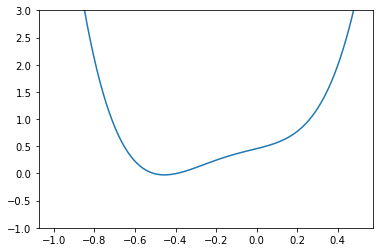

In [9]:
plt.ylim([-1, 3])
plt.plot(xmesh, f(xmesh))

Let's fix an initial guess:

In [10]:
x_exact = -0.4549

In [11]:
x = 0.5

In [12]:
dfx = df(x)
d2fx = d2f(x)

# carry out the Newton step
xnew = x - dfx / d2fx

# plot approximate function
plt.plot(xmesh, f(xmesh))
plt.plot(xmesh, f(x) + dfx*(xmesh-x) + d2fx*(xmesh-x)**2/2)
plt.plot(x, f(x), "o", color="red")
plt.plot(xnew, f(xnew), "o", color="green")
plt.ylim([-1, 3])

# update
x = xnew
print(x)

In [13]:
x = -0.1 #0.2
for i in range(30):
    
    dfx = df(x)
    d2fx = d2f(x)
    xnew = x - dfx / d2fx
    if np.abs(xnew-x) < 1e-8:
        break
    print(" %i %10g " % (i,x) )
    x = xnew    

### c) Using scipy library

In [14]:
import scipy.optimize as sopt

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [15]:
sopt.minimize?

In [16]:
x0 = 2
sopt.minimize(f, x0)

In [17]:
sopt.golden(f,brack=(-8,2))

## 3) ND Optimization Methods

We provide three example of functions. You will be able to observe difference convergence carachteristics among them.

#### Function 1:
$$ f(x,y) = 0.5 x^2 + 2.5 y^2 $$

In [18]:
def f1(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def df1(x):
    return np.array([x[0], 5*x[1]])

def ddf1(x):
    return np.array([
                     [1,0],
                     [0,5]
                     ])

#### Function 2:
$$ f(x,y) = (x-1)^2 + (y-1)^2 $$

In [19]:
def f2(x):
    return (x[0]-1)**2 + (x[1]-1)**2

def df2(x):
    return np.array([2*(x[0]-1),2*(x[1]-1) ])

def ddf2(x):
    return np.array([
                     [2,0],
                     [0,2]
                     ])

#### Function 3:
$$ f(x,y) = 100 (y-x^2)^2 + (1-x)^2 $$

In [20]:
def f3(X):
    x = X[0]
    y = X[1]
    val = 100.0 * (y - x**2)**2 + (1.0 - x)**2
    return val

def df3(X):
    x = X[0]
    y = X[1]
    val1 = -400.0 * (y - x**2) * x - 2 * (1 - x)
    val2 = 200.0 * (y - x**2)
    return np.array([val1, val2])

def ddf3(X):
    x = X[0]
    y = X[1]
    val11 = -400.0 * (y - x**2) + 800.0 * x**2 + 2
    val12 = -400.0 * x
    val21 = -400.0 * x
    val22 = 200.0
    return np.array([[val11, val12], [val21, val22]])

#### Helper functions for plotting

In [21]:
def plotFunction(f, interval=(-2,2), levels=20, steps=None, fhist=None):
    
    a,b = interval
    
    xmesh, ymesh = np.mgrid[a:b:100j,a:b:100j]
    fmesh = f(np.array([xmesh, ymesh]))
    
    
    fig = plt.figure(figsize=(16,4))

    ax = fig.add_subplot(131,projection="3d")
    ax.plot_surface(xmesh, ymesh, fmesh,cmap=plt.cm.coolwarm);
    plt.title('3d plot of f(x,y)')

    ax = fig.add_subplot(132)
    ax.set_aspect('equal')
    c = ax.contour(xmesh, ymesh, fmesh, levels=levels)

    plt.title('2d countours of f(x,y)')
    ax.clabel(c, inline=1, fontsize=10)
    
    if steps is not None:  
        plt.plot(steps.T[0], steps.T[1], "o-", lw=3, ms=10)
     
    if fhist is not None:
        ax = fig.add_subplot(133)
        plt.semilogy(fhist, '-o')
        plt.xlabel('iteration')
        plt.ylabel('f')
        plt.grid()


In [22]:
plotFunction(f1)

In [23]:
plotFunction(f2)

In [24]:
plotFunction(f3,levels=np.logspace(0,4,10))

In [25]:
def plotConvergence( steps, exact , r ):
       
    error = la.norm(np.array(steps) - np.array(exact),axis=1)
    ratio = []
    for k in range(len(error)-1):
        ratio.append( error[k+1]/error[k]**r )

    fig = plt.figure(figsize=(4,4))

    plt.plot(ratio, "o-", lw=3, ms=10)
    plt.ylim(0,2)

### A) Steepest Descent

In [26]:
def steepestDescent(f,df,x0,maxiter,tol,alpha = 0):

    # Line search function
    def f_line(alpha):
        fnew = f(x + alpha*s)
        return fnew
    
    steps = [x0]   
    x = x0
    fhist = [f(x)]
    
    # Steepest descent with line search
    for i in range(maxiter):

        # Get the gradient
        s = -df(x)

        # Learning rate:
        if alpha == 0:
            # Perform line search
            alpha_opt = sopt.golden(f_line)
        else:
            alpha_opt = alpha

        # Steepest descent update
        xnew = x + alpha_opt * s

        # Save optimized solution for plotting
        steps.append(xnew)
        
        fhist.append(f(xnew))

        # Check convergence
        
        if ( np.abs(fhist[-1] - fhist[-2]) < tol ):
            break

        x = xnew
        
    print('optimal solution is:', x)
        
    return steps, fhist, i   

In [27]:
# Initial guess
x0 = np.array([2, 2./5])
# Steepest descent
steps, fhist, iterations = steepestDescent(f1,df1,x0,50,1e-6)
print('converged in', iterations, 'iterations')
# Plot convergence   
plotFunction(f1,steps=np.array(steps),fhist=np.array(fhist))

plotConvergence( steps, [0,0] , 1 )

In [28]:
# Initial guess
x0 = np.array([-1.5, -1])
# Steepest descent
steps, fhist, iterations = steepestDescent(f2,df2,x0,50,1e-4)
print('converged in', iterations, 'iterations')
# Plot convergence   
plotFunction(f2,steps=np.array(steps),fhist=np.array(fhist))



In [29]:
# Initial guess
x0 = np.array([0, 1.75])
# Steepest descent
steps, fhist, iterations = steepestDescent(f3,df3,x0,1000,1e-6)
print('converged in', iterations, 'iterations')
# Plot convergence   
plotFunction(f3,steps=np.array(steps),levels=np.logspace(0,4,8), fhist=np.array(fhist))

plotConvergence( steps, [1 , 1] , 1 )

In [30]:
# Initial guess
x0 = np.array([-0.5, -1])
# Steepest descent
steps, fhist, iterations = steepestDescent(f3,df3,x0,1000,1e-6)
print('converged in', iterations, 'iterations')
# Plot convergence   
plotFunction(f3,steps=np.array(steps),levels=np.logspace(0,4,8), fhist=np.array(fhist))

plotConvergence( steps, [1 , 1] , 1 )

### B) Newton's method

In [31]:
def NewtonMethod(f,df,ddf,x0,maxiter,tol):
    
    steps = [x0]   
    x = x0
    fhist = [f(x)]
    
    # Steepest descent with line search
    for i in range(maxiter):

        # Get the newton step
        s = la.solve(ddf(x), -df(x))

        # Steepest descent update
        xnew = x + s

        # Save optimized solution for plotting
        steps.append(xnew)
        
        fhist.append(f(xnew))

        # Check convergence
        
        if ( np.abs(fhist[-1] - fhist[-2]) < tol ):
            break

        x = xnew
        
    print('optimal solution is:', x)
        
    return steps, fhist, i 

In [32]:
# Initial guess
x0 = np.array([2, 2./5])
# Newton's method
steps, fhist, iterations = NewtonMethod(f1,df1,ddf1,x0,50,1e-6)
print('converged in', iterations, 'iterations')
# Plot convergence   
plotFunction(f1,steps=np.array(steps),fhist=np.array(fhist))


In [33]:
# Initial guess
x0 = np.array([-1, -1.0])
# Newton's method
steps, fhist, iterations = NewtonMethod(f2,df2,ddf2,x0,50,1e-6)
print('converged in', iterations, 'iterations')
# Plot convergence   
plotFunction(f2,steps=np.array(steps),fhist=np.array(fhist))


In [34]:
# Initial guess
x0 = np.array([-0.5, -1])
# Newton's method
steps, fhist, iterations = NewtonMethod(f3,df3,ddf3,x0,50,1e-8)
print('converged in', iterations, 'iterations')
# Plot convergence   
plotFunction(f3,steps=np.array(steps),levels=np.logspace(0,4,8), fhist=np.array(fhist))

plotConvergence( steps, [1 , 1] , 2 )